In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [15]:
import glob
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow.keras as keras

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [3]:
for dirname, _, filenames in os.walk('../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train'):
    print(dirname)
#     for filename in filenames:
#         print(filenames[0])

../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Lolyda.AA3
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Malex.gen!J
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/C2LOP.gen!g
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Wintrim.BX
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Instantaccess
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Obfuscator.AD
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Allaple.L
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/VB.AT
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Lolyda.AA2
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Lolyda.AA1
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_da

In [ ]:
# for dirname, _, filenames in os.walk('../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Lolyda.AA3'):
#     print(filenames)
#     print(dirname)


In [ ]:
# img = cv2.imread('../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Lolyda.AA3/00a48e6d8074efd6c419fda12acf035c.png')
# img.shape

In [ ]:
# import cv2
# # img = cv2.imread('../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Lolyda.AA3/00a48e6d8074efd6c419fda12acf035c.png')
# # img.shape

# # img = cv2.imread('../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Lolyda.AA3/00a48e6d8074efd6c419fda12acf035c.png')
# # img.shape

# for dirname, _, filenames in os.walk('../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Lolyda.AA3'):
#     for file in filenames : 
#         img = cv2.imread(dirname+"/"+file)
#         print(img.shape)

In [62]:
path_root = '../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train'
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(128,128), 
                                                   batch_size=8500,color_mode="rgb")

Found 8404 images belonging to 25 classes.


In [64]:
from sklearn.model_selection import train_test_split
imgs, labels = next(batches)

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [44]:
from keras.preprocessing.image import ImageDataGenerator
path_root = '../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train'

id_gen = ImageDataGenerator(rescale=1./255., 
                            validation_split=0.1,
#                             shear_range=0.2,
#                             zoom_range=0.2,
#                             horizontal_flip=True
                           )

train_generator = id_gen.flow_from_directory(directory=path_root,
                                           target_size=(128,128),
                                           class_mode="categorical",
                                           subset='training',
                                           color_mode="rgb")

validation_generator = id_gen.flow_from_directory(directory=path_root, 
                                                  target_size=(128,128),
                                                  class_mode="categorical",                                                 
                                                  subset='validation',
                                                  color_mode="rgb")

Found 7574 images belonging to 25 classes.
Found 830 images belonging to 25 classes.


In [5]:
from tqdm import tqdm
imgs, labels = tqdm(next(batches))

100%|██████████| 2/2 [00:00<00:00, 19373.23it/s]


In [6]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [ ]:
imgs.shape

In [66]:
def model_builder(modelname):
    modelinit = modelname(input_shape=(128, 128, 3), 
                                          weights='imagenet', 
                                          include_top=False, 
                                          pooling='avg')
    model = Sequential([
        modelinit,
        Flatten(),
        Dense(25, activation='softmax')])
    
    return model

def trainingloop(model):
    
    model.compile(optimizer = 'adam', 
                  loss = 'categorical_crossentropy', 
                  metrics = ['acc'])
    
    history = model.fit(X_train,y_train,
                        validation_split=0.2,
#                     validation_ = validation_generator,
#                     steps_per_epoch=16, 
#                     validation_steps=8,
                   epochs=10)
    
    return model,history

def train_multimodels(model_tech_names): 
    models=[]
    for model_name in tqdm(model_tech_names):
        model = model_builder(model_name)
        model,_ = trainingloop(model)
        models.append(model)
    return models

In [88]:
from keras.applications import (VGG16,
                                InceptionResNetV2,
                                VGG19,
                                DenseNet201, 
                                Xception)

In [89]:
model_builder(InceptionResNetV2).summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 1536)              54336736  
_________________________________________________________________
flatten_13 (Flatten)         (None, 1536)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 25)                38425     
Total params: 54,375,161
Trainable params: 54,314,617
Non-trainable params: 60,544
_________________________________________________________________


In [90]:
model_builder(VGG16).summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten_14 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 25)                12825     
Total params: 14,727,513
Trainable params: 14,727,513
Non-trainable params: 0
_________________________________________________________________


In [91]:
# trained_models = []
# models = [model,model_inres]
model_names = ['Vgg16', 'InceptionResNet', 'VGG19', 'DenseNet201', 'Xception']
model_tech_names = [VGG16, InceptionResNetV2, VGG19, DenseNet201, Xception]

trained_models = (train_multimodels(model_tech_names))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/10
148/148 [==============================] - 13s 82ms/step - loss: 3.4067 - acc: 0.2850 - val_loss: 1.8160 - val_acc: 0.4078
Epoch 2/10
148/148 [==============================] - 12s 79ms/step - loss: 1.0672 - acc: 0.6106 - val_loss: 0.7219 - val_acc: 0.7935
Epoch 3/10
148/148 [==============================] - 12s 79ms/step - loss: 0.4021 - acc: 0.8844 - val_loss: 0.1638 - val_acc: 0.9516
Epoch 4/10
148/148 [==============================] - 12s 80ms/step - loss: 0.2004 - acc: 0.9408 - val_loss: 0.1756 - val_acc: 0.9524
Epoch 5/10
148/148 [==============================] - 12s 79ms/step - loss: 0.2008 - acc: 0.9395 - val_loss: 0.2117 - val_acc: 0.9414
Epoch 6/10
148/148 [==============================] - 12s 80ms/step - loss: 0.1866 - acc: 0.9445 - val_loss: 0.1416 - val_acc: 0.9490
Epoch 7/10
148/148 [==============================] - 12s 79ms/step - loss: 0.1155 - acc: 0.9647 - val_loss: 0.1404 - val_acc: 0.9584
Epoch 8/10
148/148 [==============================] - 12s 79ms

 20%|██        | 1/5 [01:59<07:57, 119.47s/it]

Epoch 1/10
148/148 [==============================] - 46s 201ms/step - loss: 1.0458 - acc: 0.7161 - val_loss: 1.4945 - val_acc: 0.6466
Epoch 2/10
148/148 [==============================] - 25s 172ms/step - loss: 0.1142 - acc: 0.9625 - val_loss: 0.4014 - val_acc: 0.8003
Epoch 3/10
148/148 [==============================] - 26s 173ms/step - loss: 0.0699 - acc: 0.9803 - val_loss: 0.3819 - val_acc: 0.9235
Epoch 4/10
148/148 [==============================] - 26s 173ms/step - loss: 0.0813 - acc: 0.9798 - val_loss: 0.1057 - val_acc: 0.9694
Epoch 5/10
148/148 [==============================] - 25s 172ms/step - loss: 0.0396 - acc: 0.9895 - val_loss: 0.0884 - val_acc: 0.9737
Epoch 6/10
148/148 [==============================] - 26s 173ms/step - loss: 0.0576 - acc: 0.9843 - val_loss: 0.1329 - val_acc: 0.9669
Epoch 7/10
148/148 [==============================] - 26s 173ms/step - loss: 0.0493 - acc: 0.9854 - val_loss: 2.7867 - val_acc: 0.9099
Epoch 8/10
148/148 [==============================] - 2

 40%|████      | 2/5 [06:42<10:46, 215.50s/it]

80142336/80134624 [==============================] - 1s 0us/step
Epoch 1/10
148/148 [==============================] - 15s 97ms/step - loss: 13.3674 - acc: 0.2757 - val_loss: 2.4631 - val_acc: 0.3356
Epoch 2/10
148/148 [==============================] - 14s 94ms/step - loss: 2.4645 - acc: 0.3392 - val_loss: 2.4277 - val_acc: 0.3356
Epoch 3/10
148/148 [==============================] - 14s 94ms/step - loss: 2.4779 - acc: 0.3093 - val_loss: 2.4339 - val_acc: 0.3356
Epoch 4/10
148/148 [==============================] - 14s 94ms/step - loss: 2.4784 - acc: 0.3204 - val_loss: 2.4252 - val_acc: 0.3356
Epoch 5/10
148/148 [==============================] - 14s 94ms/step - loss: 2.4498 - acc: 0.3374 - val_loss: 2.4254 - val_acc: 0.3356
Epoch 6/10
148/148 [==============================] - 14s 94ms/step - loss: 2.4446 - acc: 0.3255 - val_loss: 2.4296 - val_acc: 0.3356
Epoch 7/10
148/148 [==============================] - 14s 95ms/step - loss: 2.4483 - acc: 0.3378 - val_loss: 2.4256 - val_acc: 0.3

 60%|██████    | 3/5 [09:04<06:03, 181.97s/it]

74842112/74836368 [==============================] - 1s 0us/step
Epoch 1/10
148/148 [==============================] - 45s 177ms/step - loss: 0.6767 - acc: 0.8238 - val_loss: 2.7730 - val_acc: 0.4953
Epoch 2/10
148/148 [==============================] - 21s 144ms/step - loss: 0.1523 - acc: 0.9577 - val_loss: 3.4281 - val_acc: 0.6015
Epoch 3/10
148/148 [==============================] - 21s 144ms/step - loss: 0.0956 - acc: 0.9696 - val_loss: 1.8625 - val_acc: 0.4274
Epoch 4/10
148/148 [==============================] - 21s 144ms/step - loss: 0.1129 - acc: 0.9666 - val_loss: 0.1637 - val_acc: 0.9346
Epoch 5/10
148/148 [==============================] - 21s 144ms/step - loss: 0.1112 - acc: 0.9677 - val_loss: 0.5616 - val_acc: 0.8556
Epoch 6/10
148/148 [==============================] - 21s 144ms/step - loss: 0.1026 - acc: 0.9708 - val_loss: 0.9073 - val_acc: 0.7842
Epoch 7/10
148/148 [==============================] - 21s 145ms/step - loss: 0.0877 - acc: 0.9755 - val_loss: 4.5736 - val_ac

 80%|████████  | 4/5 [13:08<03:26, 206.58s/it]

83689472/83683744 [==============================] - 1s 0us/step
Epoch 1/10
148/148 [==============================] - 26s 145ms/step - loss: 0.9018 - acc: 0.7763 - val_loss: 1.6846 - val_acc: 0.6703
Epoch 2/10
148/148 [==============================] - 20s 137ms/step - loss: 0.1527 - acc: 0.9571 - val_loss: 3.1680 - val_acc: 0.6636
Epoch 3/10
148/148 [==============================] - 20s 137ms/step - loss: 0.1269 - acc: 0.9660 - val_loss: 0.3841 - val_acc: 0.9346
Epoch 4/10
148/148 [==============================] - 20s 136ms/step - loss: 0.0988 - acc: 0.9718 - val_loss: 0.1328 - val_acc: 0.9592
Epoch 5/10
148/148 [==============================] - 20s 136ms/step - loss: 0.0999 - acc: 0.9738 - val_loss: 0.1139 - val_acc: 0.9669
Epoch 6/10
148/148 [==============================] - 20s 137ms/step - loss: 0.0767 - acc: 0.9783 - val_loss: 0.3218 - val_acc: 0.9329
Epoch 7/10
148/148 [==============================] - 20s 136ms/step - loss: 0.0847 - acc: 0.9726 - val_loss: 0.1281 - val_ac

100%|██████████| 5/5 [16:38<00:00, 199.76s/it]


In [50]:
path_root = '../input/malimg-dataset9010/validation_ds_update_924/validation_ds_update_924/malimg_dataset/validation'
id_gen = ImageDataGenerator(rescale=1./255.,
#                             shear_range=0.2,
#                             zoom_range=0.2,
#                             horizontal_flip=True
                           )

val_data = id_gen.flow_from_directory(directory=path_root,
                                           target_size=(128,128),
                                           class_mode="categorical",
                                           color_mode="rgb")

Found 924 images belonging to 25 classes.


In [92]:
import seaborn as sns
sns.set(font_scale=2) 
def heatmap_plotter(trained_models):
    for model in trained_models:
        plt.figure(figsize=(16,9))
        ax=sns.heatmap(confusion_matrix(np.argmax(y_test,axis=1), np.argmax(model.predict(X_test), axis=1), normalize='true'))
        ax.set(title="Malware Detection", xlabel="Predicted Malware", ylabel="Name of Malware")
        plt.show()

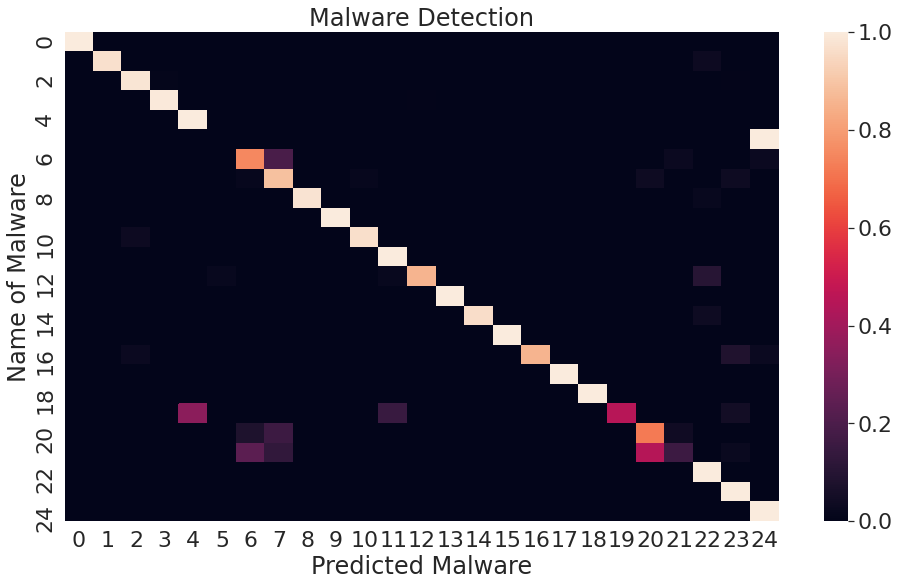

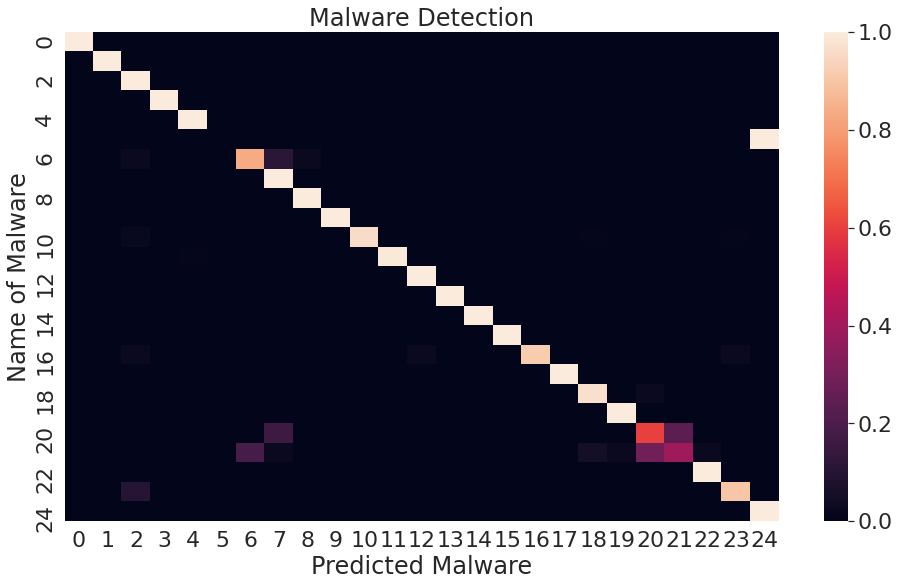

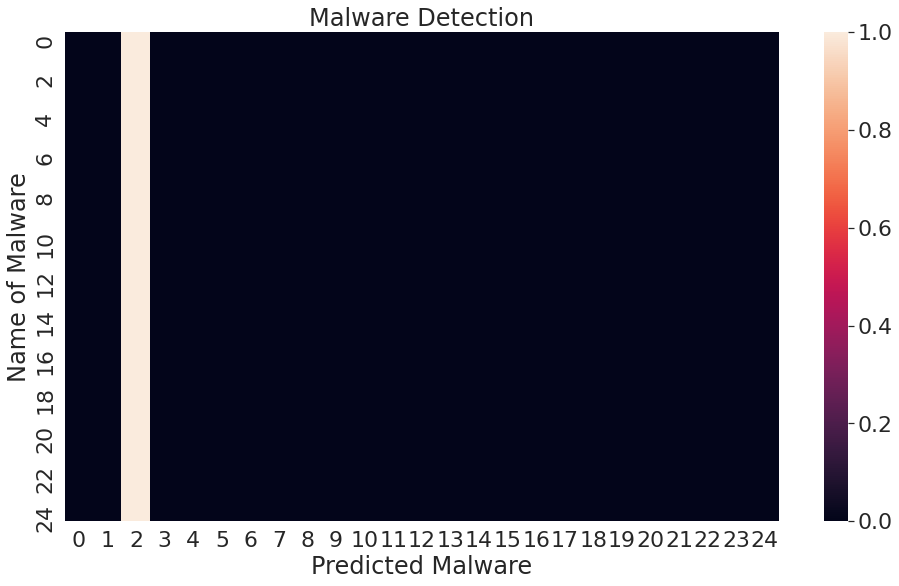

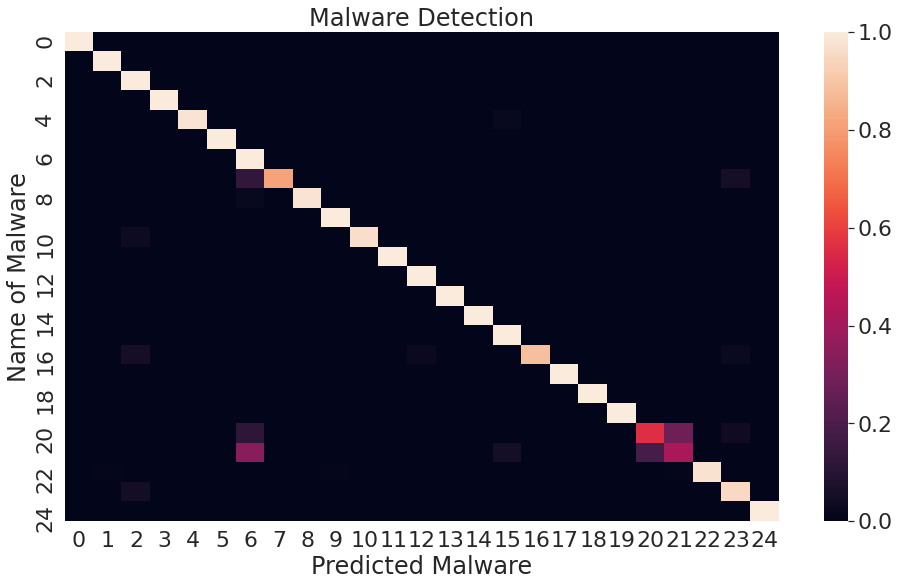

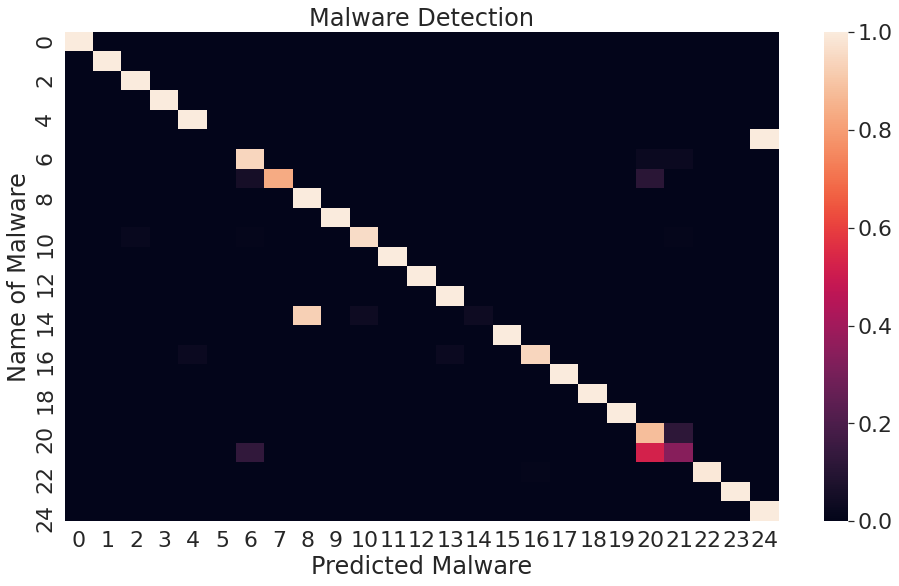

In [93]:
heatmap_plotter(trained_models)

In [98]:
import warnings
warnings.simplefilter('ignore')
scores = {'model_name':[], 'accuracies':[], 'f1score':[]}
for idx,m in tqdm(enumerate(trained_models)):
    scores['model_name'].append(model_names[idx])
    scores['accuracies'].append(accuracy_score(np.argmax(y_test,axis=1), np.argmax(m.predict(X_test), axis=1)))
    scores['f1score'].append(f1_score(np.argmax(y_test,axis=1), np.argmax(m.predict(X_test), axis=1), average='weighted'))

5it [00:29,  5.81s/it]


In [99]:
import pandas as pd
df = pd.DataFrame(columns=['Model_Name', 'Accuracy', 'F1_Score'])
# accs = scores['accuracies']
# f1_scores = scores['f1scores']
df['Model_Name'] = scores['model_name']
df['Accuracy'] = scores['accuracies']
df['F1_Score'] = scores['f1score']

In [100]:
df

,Model_Name,Accuracy,F1_Score
0,Vgg16,0.952815,0.945992
1,InceptionResNet,0.972244,0.967116
2,VGG19,0.339017,0.171667
3,DenseNet201,0.977002,0.976410
4,Xception,0.963521,0.955822


In [ ]:
print("[INFO] compiling model...")
opt = Adam(lr=1e-3)
# model1 = model_tech_names[1]#.build(width=28, height=28, depth=1, classes=10)
# model.compile(loss="categorical_crossentropy", optimizer=opt,
# 	metrics=["accuracy"])
# train the simple CNN on MNIST
model = model_builder(InceptionResNetV2)
print("[INFO] training network...")
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

history = model.fit(imgs,labels,
                    validation_split=0.2,
#                     validation_ = validation_generator,
#                     steps_per_epoch=16, 
#                     validation_steps=8,
               epochs=10)

# model.fit(imgs, trainY,
# # 	validation_data=(testX, testY),
# 	batch_size=64,
# 	epochs=10,
# 	verbose=1)
# make predictions on the testing set for the model trained on
# non-adversarial images
# (loss, acc) = model.evaluate(x=testX, y=testY, verbose=0)
# print("[INFO] loss: {:.4f}, acc: {:.4f}".format(loss, acc))

In [ ]:
plt.imshow(cv2.cvtColor(imgs[1], cv2.COLOR_RGB2GRAY),cmap='gray')
plt.title(np.argmax(labels[1]))

In [ ]:
image_probs = model.predict(np.array([imgs[1]]))

In [ ]:
image_probs

In [ ]:
tf.image.convert_image_dtype(np.array([imgs[1]]), dtype=tf.float16, saturate=False).shape

In [ ]:
image_probs = model.predict(np.array([imgs[1]]))

loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = loss_object(input_label, prediction)

    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad

# Get the input label of the image.
labrador_retriever_index = 19
label = tf.one_hot(labrador_retriever_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

image = tf.image.convert_image_dtype(np.array([imgs[1]]), dtype=tf.float16, saturate=False)
perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]


In [ ]:
for i in np.random.choice(np.arange(0, len(imgs)), size=(25,)):
    # grab the current image and label
    image = imgs[i]
    label = trainY[i]
    # generate an image adversary for the current image and make
    # a prediction on the adversary
    adversary = generate_image_adversary(model,
        image.reshape(1, 128, 128, 3), label, eps=0.1)
    pred = model.predict(adversary)
    
    adversary = adversary.reshape((128, 128)) * 255
    adversary = np.clip(adversary, 0, 255).astype("uint8")
    image = image.reshape((128, 128)) * 255
    image = image.astype("uint8")
    
    # convert the image and adversarial image from grayscale to three
    # channel (so we can draw on them)
    image = np.dstack([image] * 3)
    adversary = np.dstack([adversary] * 3)
    
    # resize the images so we can better visualize them
    image = cv2.resize(image, (96, 96))
    adversary = cv2.resize(adversary, (96, 96))
    
    imagePred = label.argmax()
	adversaryPred = pred[0].argmax()
	color = (0, 255, 0)
	# if the image prediction does not match the adversarial
	# prediction then update the color
	if imagePred != adversaryPred:
		color = (0, 0, 255)
	# draw the predictions on the respective output images
	cv2.putText(image, str(imagePred), (2, 25),
		cv2.FONT_HERSHEY_SIMPLEX, 0.95, (0, 255, 0), 2)
	cv2.putText(adversary, str(adversaryPred), (2, 25),
		cv2.FONT_HERSHEY_SIMPLEX, 0.95, color, 2)
	# stack the two images horizontally and then show the original
	# image and adversarial image
	output = np.hstack([image, adversary])
	cv2.imshow("FGSM Adversarial Images", output)

In [ ]:
# from tqdm import tqdm
# imgs,labels = next(train_generator)

In [ ]:
plt.imshow(cv2.cvtColor(imgs[1], cv2.COLOR_RGB2GRAY),cmap='gray')

In [ ]:
# for idx in tqdm(range(7574  + 830)):
#     if idx==0:
#         df = pd.DataFrame([imgs[idx].flatten()])
#     else : 
#         df = df.append([imgs[idx].flatten()], ignore_index=True)

In [ ]:
# df

In [ ]:
# flatten(imgs[0])

In [ ]:
# from tqdm import tqdm
# next(batches)

In [ ]:
imgs.shape

In [ ]:
# def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
#     if type(ims[0]) is np.ndarray:
#         ims = np.array(ims).astype(np.uint8)
#         if (ims.shape[-1] != 3):
#             ims = ims.transpose((0,2,3,1))
#     f = plt.figure(figsize=figsize)
#     cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
#     for i in tqdm(range(0,50)):
#         sp = f.add_subplot(rows, cols, i+1)
#         sp.axis('Off')
#         if titles is not None:
#             sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
#         plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
# plots(imgs, titles = labels)

In [ ]:
classes = batches.class_indices.keys()
perc = (sum(labels)/labels.shape[0])*100

plt.xticks(rotation='vertical')
plt.bar(classes,perc)

In [ ]:
sum(labels)

In [ ]:
# labels_

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# path_root = '../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Lolyda.AA3'

# id_gen = ImageDataGenerator(rescale=1./255., 
#                             validation_split=0.1,
# #                             shear_range=0.2,
# #                             zoom_range=0.2,
# #                             horizontal_flip=True
#                            )
# train_generator = id_gen.flow_from_directory(directory=path_root,
#                                            target_size=(512,512,3),
#                                            class_mode="categorical",
#                                            subset='training',
#                                            color_mode="rgb")

In [ ]:
trained_models[0].save("./vgg16_trained.h5")

In [ ]:
trained_models[1].save("./InceptionResNet_trained.h5")

In [ ]:
pretrained_model = keras.models.load_model('./InceptionResNet_trained.h5')

In [ ]:
image = cv2.imread('../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/validation/Allaple.A/00000d3e89aa9d228251616ae7a6ab06.png')
image = cv2.resize(image, (128,128))

In [ ]:
image.shape

In [ ]:
# pretrained_model.predict(image)

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = pretrained_model(input_image)
        loss = loss_object(input_label, prediction)

        # Get the gradients of the loss w.r.t to the input image.
        gradient = tape.gradient(loss, input_image)
        # Get the sign of the gradients to create the perturbation
        signed_grad = tf.sign(gradient)
    return signed_grad

In [ ]:
path_root = '../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/validation'
id_gen = ImageDataGenerator(rescale=1./255.,
#                             shear_range=0.2,
#                             zoom_range=0.2,
#                             horizontal_flip=True
                           )

val_data = id_gen.flow_from_directory(directory=path_root,
                                           target_size=(128,128),
                                           class_mode="categorical",
                                           color_mode="rgb")

In [ ]:
image = cv2.imread('../input/malimg-dataset9010/validation_ds_update_924/validation_ds_update_924/malimg_dataset/validation/Allaple.A/00000d3e89aa9d228251616ae7a6ab06.png',0)
image = cv2.resize(image, (256,256))

In [ ]:
image_probs = pretrained_model.predict(val_data)

In [ ]:
from tqdm import tqdm
imgs, labels = tqdm(next(val_data))

In [ ]:
np.argmax(image_probs[0])

In [ ]:
plt.imshow(imgs[0])

In [ ]:
imgs2 = tf.convert_to_tensor(imgs, dtype=tf.float32)

In [ ]:
plt.imshow(imgs2[0])

In [ ]:
# from pyimagesearch.simplecnn import SimpleCNN
# from pyimagesearch.fgsm import generate_image_adversary
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import cv2

print("[INFO] loading MNIST dataset...")
(trainX, trainY), (testX, testY) = mnist.load_data()
trainX = trainX / 255.0
testX = testX / 255.0
# add a channel dimension to the images
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
# one-hot encode our labels
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

In [ ]:
trainX.shape

In [ ]:
imgs.shape

In [ ]:
labrador_retriever_index = 14
label = tf.one_hot(labrador_retriever_index, image_probs[0].shape[-1])
label = tf.reshape(label, (1, image_probs[0].shape[-1]))

perturbations = create_adversarial_pattern(imgs2, labels)
plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]


In [ ]:
def display_images(image, description):
    _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
    plt.figure()
    plt.imshow(image[0]*0.5+0.5)
    plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
    plt.show()

In [ ]:
epsilons = [0, 0.01, 0.1, 0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
    adv_x = image + eps*perturbations
    adv_x = tf.clip_by_value(adv_x, -1, 1)
    display_images(adv_x, descriptions[i])


In [ ]:
# vggmodel = keras.applications.vgg16.VGG16(input_shape=(256,256,3), 
#                                           weights='imagenet', 
#                                           include_top=False, 
#                                           pooling='avg')
# # vggmodel.summary()

# model = Sequential([
#     vggmodel,
#     Flatten(),
#     Dense(25, activation='softmax')
    
# ])
# model.compile(optimizer = 'adam', 
#               loss = 'categorical_crossentropy', metrics = ['acc'])

# history = model.fit(train_generator,
#                     validation_data = validation_generator,
# #                     steps_per_epoch=16, 
# #                     validation_steps=8,
#                    epochs=10)

In [ ]:

# inres = keras.applications.InceptionResNetV2(input_shape=(256,256,3), 
#                                           weights='imagenet', 
#                                           include_top=False, 
#                                           pooling='avg')
# # vggmodel.summary()

# model_inres = Sequential([
#     inres,
#     Flatten(),
#     Dense(25, activation='softmax')
    
# ])
# model_inres.compile(optimizer = 'adam', 
#               loss = 'categorical_crossentropy', metrics = ['acc'])

# history = model_inres.fit(train_generator,
#                     validation_data = validation_generator,
# #                     steps_per_epoch=16, 
# #                     validation_steps=8,
#                    epochs=10)

In [ ]:
val_path = '../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/validation'
id_gen = ImageDataGenerator(rescale=1./255.)
val_data = id_gen.flow_from_directory(directory=val_path,
                            target_size=(256,256),
                            color_mode='rgb',
                            shuffle=False)

In [ ]:
# model.predict_classes(val_data)

In [ ]:
# _,labels = next(iter(val_data))

In [ ]:
import numpy as np
# np.argmax(labels,axis=1)

In [ ]:
# val_data.labels

In [ ]:
# model.predict_classes()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [ ]:
heatmap_plotter(trained_models)

In [ ]:
scores

In [ ]:

# acc = accuracy_score(val_data.labels, model_inres.predict_classes(val_data))

In [ ]:

# f1score = f1_score(val_data.labels, model_inres.predict_classes(val_data), average='weighted')

In [ ]:
from ipywidgets import FileUpload

def on_upload_change(change):
    if not change.new:
        return
    up = change.owner
    for filename,data in up.value.items():
        print(f'writing [{filename}] to ./')
        with open(filename, 'wb') as f:
            f.write(data['content'])
    up.value.clear()
    up._counter = 0

upload_btn = FileUpload(accept='.png')
upload_btn.observe(on_upload_change, names='_counter')
upload_btn

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

In [ ]:
from PIL import Image
import io
import cv2

for name, file_info in upload_btn.value.items():
    img = Image.open(io.BytesIO(file_info['content'])).convert('RGB')
    img = img.resize((512,512), Image.NEAREST)
    img = keras.preprocessing.image.img_to_array(img)
#     img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
#     print(np.argmax(trained_models[0].predict(np.array([img]))))
    
np.array(img).shape